Project 6

# Project description  
  
Marketing analysis of Yandex.Afisha to help optimize marketing expenses.

### Table of Contents: <a class="anchor" id="contents"></a>

#### [1. Preparing environment and uploading data](#chapter1)
   * [1.1 Importing packages](#chapter2)
   * [1.2 Loading and optimizing datasets](#chapter3)

#### [2. Studying the general information](#chapther4)
   * [2.1 Visits table](#chapter5)
   * [2.1 Orders table](#chapter6)
   * [2.1 Costs table](#chapter7)
   * [2.1 Conclusion](#chapter8)
  
#### [3. Data preprocessing](#chapter9)
   * [3.1 Columns names preparation](#chapter10)
   * [3.2 Processing abnormal values](#chapter11)
   * [3.3 Conclusion](#chapter12) 
   
  
#### [4. Making reports and calculating metrics](#chapter13)
   * [4.1 Product](#chapter14)
       * [1. How many people use it every day, week, and month?](#chapter15)
           * [DAU, WAU, MAU](#chapter16)
       * [2. How many sessions are there per day?](#chapter18)
           * [Usage frequency](#chapter17)
       * [3. What is the length of each session?](#chapter19)
       * [4. How often do users come back?](#chapter20)
           * [Sticky factor](#chapter21)
           * [Retention rate](#chapter22)
           * [Churn rate](#chapter23)
       * [5. Conclusion](#chapter41)  
      
      
   * [4.2 Sales](#chapter24)
       * [1. When do people start buying?](#chapter25)
       * [2. How many orders do they make during a given period of time?](#chapter26)
           * [Purchase frequency](#chapter27)
           * [Repeat purchase rate](#chapter28)
       * [3. What is the average purchase size?](#chapter29)
           * [ARPU, ARPPU, AOV](#chapter30)
       * [4. How much money do they bring?](#chapter31)
           * [Lifetime value](#chapter32)
       * [5. Conclusion](#chapter42)             
             
             
   * [4.3 Marketing](#chapter33)
       * [1. How much money was spent?](#chapter34)
       * [2. How much did customer acquisition from each of the sources cost?](#chapter35)
           * [Customer Acquisition Cost](#chapter36)
       * [3. How worthwhile where the investments?](#chapter37)
           * [Return on marketing investment](#chapter38)
       * [4. Conclusion](#chapter39)  
  
#### [5. General conclusion](#chapter40)

### 1.  Preparing environment and uploading data <a class="anchor" id="chapter1"></a>

#### 1.1 Importing packages <a class="anchor" id="chapter2"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

[Back to the Table of Contents](#contents)

#### 1.2 Loading and optimizing datasets <a class="anchor" id="chapter3"></a>

In [2]:
#reading csv and downloading parts of data sets
visits = pd.read_csv('test', nrows=500)
orders = pd.read_csv('test', nrows=500)
costs = pd.read_csv('test', nrows=500)

Before downloading all data I took 500 rows from each data sets to check size and information about tables.

In [3]:
print('visits table:')
visits.sample()

visits table:


,Device,End Ts,Source Id,Start Ts,Uid
26,desktop,2018-03-22 09:50:00,5,2018-03-22 09:47:00,920985734427329716


The visits table contains:
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from

In [4]:
#cecking information about teh table
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Device       500 non-null object
End Ts       500 non-null object
Source Id    500 non-null int64
Start Ts     500 non-null object
Uid          500 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


Size of the 500 rows of downloaded data is 113.1 kb. Table are quite heavy.  
I will check how I can optimized data:  
- Columns 'End Ts' and 'Start Ts' contain the date and time, convert the object type to date will help us to use less space. 

In [5]:
#cecking values in column
visits.Device.value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

- Column 'Device' has only two values: desktop and touch. These are presumably device categories: computers and touch screen devices.  
Pandas has a special type for such data: category. It looks a lot like text but uses considerably less space.

In [6]:
#changing format
visits['Device'] = visits['Device'].astype('category')
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'])
visits['End Ts'] =  pd.to_datetime(visits['End Ts'])

Data type in columns were changing.

In [7]:
#checking result
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Device       500 non-null category
End Ts       500 non-null datetime64[ns]
Source Id    500 non-null int64
Start Ts     500 non-null datetime64[ns]
Uid          500 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.4 KB


Now our DataFrame is 16.4 kilobytes instead of 113.1.  
I will do the same with other tables:

In [8]:
print('orders table:')
orders.sample()

orders table:


,Buy Ts,Revenue,Uid
22,2017-06-01 11:42:00,4.15,2050423809815667474


The orders table contains:  
- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order

In [9]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
Buy Ts     500 non-null object
Revenue    500 non-null float64
Uid        500 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


Size of the downloaded data is 45 kb.
Column 'Buy Ts' contain the date and time.

In [10]:
print('costs table:')
costs.sample()

costs table:


,source_id,dt,costs
297,1,2018-03-25,87.7


The costs table contains:  
- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

In [11]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
source_id    500 non-null int64
dt           500 non-null object
costs        500 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


Size of the downloaded data is 40.7 kb.  
Column 'dt' contain the date and time.  
  
I will download full data sets with the optimized data types in columns:
   - dtype - this parameter changes data type in column;
   - parse_dates - changes format to datetime in columns.

In [12]:
#optimizing data
visits = pd.read_csv('test', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
orders = pd.read_csv('test', parse_dates=['Buy Ts'])
costs = pd.read_csv('test', parse_dates=['dt'])

All data sets were download with optimized data types.

[Back to the Table of Contents](#contents)

### 2. Studying the general information <a class="anchor" id="chapter4"></a>

#### 2.1 Visits table <a class="anchor" id="chapter5"></a>

In [13]:
#cecking the table
visits.head()
visits.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


- columns names needed to be lowercase and adjusted

In [14]:
#checking information about the table
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


- there are no missing values in columns, data types are correct

In [15]:
#checking column
visits.Device.value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

- there are two device categories: computers and touch screen devices.

In [16]:
#checking values in columns with numbers
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


- there are no zero or abnormal values

In [17]:
#checking column
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

- there are 9 ad source where people visit from, 1-7 and 9-10 source id.

In [18]:
#checking values in columns with datetime
visits.describe(include = ['datetime64'])

,End Ts,Start Ts
count,359400,359400
unique,224760,224303
top,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,23,19
first,2017-06-01 00:02:00,2017-06-01 00:01:00
last,2018-06-01 01:26:00,2018-05-31 23:59:00


- values in these columns look normal. 

let's check if there is any bugs with start and end times of visits:

In [19]:
#making function to check values
def dt(row):
    x = row['End Ts']
    y = row['Start Ts']
    if x < y: 
        return("Bug")
    elif x == y:
        return("Zero seconds")
    else:
        return("Ok")
#applying result in new column 'check'
visits['check'] = visits.apply(dt, axis=1)
#checking result
visits.check.value_counts()

Ok              323604
Zero seconds     35794
Bug                  2
Name: check, dtype: int64

I found:
- for 2 visits end time are early than start time;
- almost 10% of visits have zero seconds duration.  

Let's look on this rows and check if there is connection with any columns: 

In [20]:
#looking for the connection
visits.query('check == "Bug"')

,Device,End Ts,Source Id,Start Ts,Uid,check
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,Bug
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,Bug


- I don't see any connection, probably it was just a bug

In [21]:
#looking for the connection
visits.query('check == "Zero seconds"').sample(5)

,Device,End Ts,Source Id,Start Ts,Uid,check
351163,desktop,2017-10-29 02:15:00,4,2017-10-29 02:15:00,17638172737248973097,Zero seconds
169894,desktop,2017-06-10 00:52:00,3,2017-06-10 00:52:00,16048474203133948425,Zero seconds
197713,desktop,2017-08-05 00:29:00,3,2017-08-05 00:29:00,10176561825018941319,Zero seconds
45763,desktop,2018-01-30 16:48:00,1,2018-01-30 16:48:00,5139615590553126732,Zero seconds
60067,touch,2017-08-09 20:00:00,5,2017-08-09 20:00:00,4292916518637868885,Zero seconds


In [22]:
#looking for the connection
visits.query('check == "Zero seconds"')['Source Id'].value_counts()

4     10898
3      9025
5      7385
2      4158
1      1975
9      1297
10     1054
7         1
6         1
Name: Source Id, dtype: int64

In [23]:
#looking for the connection
visits.query('check == "Zero seconds"')['Device'].value_counts()

desktop    23689
touch      12105
Name: Device, dtype: int64

- As we can see visits with duration zero second were came from different source and device.
  
Possible causes are:
- user opened the web site/app accidentally;
- user was on one page only or his session was less than 15 seconds (as I know in Yandex.Metrica a refusal is counted if the user was on the site for less than 15 seconds, in Google Analytics the duration of single page veiw session is always considered 0 seconds and is considered a failure).    
  
I can't be sure about reason why user left so fast, but I can calculate bounce rates:

In [24]:
BR = len(visits.query('check == "Zero seconds"'))/len(visits)
print('Bounce rate is: {:.1%}'.format(BR))

Bounce rate is: 10.0%


**Bounce rate(BR)** - proportions of visitors who left the site immediately, as soon as they went to it or they viewed only one page during the visit.  
Typically BR fall between 26% and 70% and BR in the range of 26 to 40% is excellent.  
- our bounce rate is 10% - this is low, and it means that the page effectively causes visitors to view more pages and continue deeper into the web site;
- in our case bounce rate doesn't depends on a specific source or device.

[Back to the Table of Contents](#contents)

#### 2.1 Orders table <a class="anchor" id="chapter6"></a>

In [25]:
#cecking the table
orders.head()
orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


- columns names needed to be lowercase and adjusted

In [26]:
#cecking information about the table
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


- there are no missing values in columns, data types are correct

In [27]:
#checking values in column with numbers
orders.Revenue.describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

- revenue range from 0 to 2633 y.e.;
- there are small amount of users (less than 25%) who pay much more than others, probably it is corporate users;
- there are zero values.  

In [28]:
#finding number of zero values
zero_revenue = orders.query('Revenue == 0')['Uid'].count()
print('Number of zero values:', zero_revenue)

Number of zero values: 51


- there are 51 zero values in column 'Revenue'  
  
I checked Yandex.Afisha website and can assume that zero revenue from user can be if: 
- there is a bug; 
- user paid by gift certificates (probably moment when the certificate was buyed count as revenue equal of costs of certificate and moment when certificate was used  count as zero revenue)

In [29]:
#checking values in columns with datetime
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

- our considered period are from June 2017 through May 2018 and latest order date and time contain to June;  
  
Looking to time of this purchase 00:02:00 I assume that session of this order started in May and this is the reason why we have this value in data. I will change this date on 2018-05-31 23:59:00 if it will be necessary for analysis.
   
- other values in this column look normal and dates correspond to dates in the visits table.

[Back to the Table of Contents](#contents)

#### 2.1 Costs table <a class="anchor" id="chapter7"></a>

In [30]:
#cecking the table
costs.head()
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


- name of column 'dt' contain only date and need to be changed

In [31]:
#cecking information about the table
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


- there are no missing values in columns, data types are correct

In [32]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

- there are 7 ad source which company spent money for, 1-5 and 9-10 source id.

In [33]:
#checking values in columns
costs.describe(include='all')

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2018-03-03 00:00:00,NaN
freq,NaN,7,NaN
first,NaN,2017-06-01 00:00:00,NaN
last,NaN,2018-05-31 00:00:00,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000


- values in these columns look normal and dates correspond to dates in the considered period

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter8"></a>

Data sets were studied.  
I found:  
visits table:
- columns names needed to be lowercase and adjusted;
- two bugs with start and end visit date time;
- visits with zero seconds duration;
- bounce rate is 10%.
  
orders table:
- columns names needed to be lowercase and adjusted;
- zero values in column 'Revenue';
- purchase in June.

costs table:
- name of column 'dt' need to be changed.

[Back to the Table of Contents](#contents)

### 3. Data preprocessing <a class="anchor" id="chapter9"></a>

#### 3.1 Columns names preparation <a class="anchor" id="chapter10"></a>

In [34]:
#changing letter case in column names
visits.columns = visits.columns.str.lower()
#renaming columns
visits.rename(columns={'end ts': 'end_ts'}, inplace=True)
visits.rename(columns={'source id': 'source_id'}, inplace=True)
visits.rename(columns={'start ts': 'start_ts'}, inplace=True)
#checking result
visits.sample()

,device,end_ts,source_id,start_ts,uid,check
88746,desktop,2018-03-17 11:15:00,3,2018-03-17 11:07:00,3794429147609413700,Ok


In [35]:
#changing letter case in column names
orders.columns = orders.columns.str.lower()
#renaming columns
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
#checking result
orders.sample()

,buy_ts,revenue,uid
38653,2018-03-07 10:50:00,4.89,6917012148479297237


In [36]:
#renaming columns
costs.rename(columns={'dt': 'date'}, inplace=True)
#checking result
costs.sample()

,source_id,date,costs
1635,5,2017-12-01,216.67


I made letters in lowercase and changed column names.

[Back to the Table of Contents](#contents)

#### 3.2 Processing abnormal values <a class="anchor" id="chapter11"></a>

In [37]:
#deleting abnormal values
visits = visits.drop(visits[visits.check == "Bug"].index)
visits = visits.drop(visits[visits.check == "Zero seconds"].index)
#checking result
visits.check.value_counts()

Ok    323604
Name: check, dtype: int64

For analysis users activity we need users without bugs with start and end visits time and users with duration session not equal to zero.  
Therefore I deleted rows with zero duration seconds and with bugs.

In [38]:
#deleting unnecessary values
orders = orders.drop(orders[orders.revenue == 0].index)
#checking result
orders.query('revenue == 0')['uid'].count()

0

As I assumed in the previous step, if users with zero revenue used gift certificates - we can delete these rows with zero revenue, cause we already have revenue from this purchase somewhere (probably moment when the certificate was buyed count as revenue equal of costs of certificate and moment when certificate was used  count as zero revenue).  
I deleted rows with zero revenue.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter12"></a>

Data was preprocessed. 
- letters in column names were made lowercase;
- column names in tables were changed;
- abnormal values were deleted;
- unnecessary for analysis values were deleted.

[Back to the Table of Contents](#contents)

### 4. Making reports and calculating metrics <a class="anchor" id="chapter13"></a>

#### 4.1 Product <a class="anchor" id="chapter14"></a>

In [39]:
#checking basic values
total_visits = len(visits)
nunique_users_visits = visits.uid.nunique()
print('Total number of visits:', total_visits)
print('Number of users:', nunique_users_visits)

Total number of visits: 323604
Number of users: 207051


In [40]:
#making category with users made orders
paying_users = orders.uid
nunique_users_orders = orders.uid.nunique()
print('Number of paying users:', nunique_users_orders)

Number of paying users: 36509


With given data we can't know on which visit exactly the purchase was made.  
We can merge the visits and orders tables and approximately find the first source or device where user come from, but during analysis I found that some users did fast buying (buying without visits other pages, I will cover it in the next section).  
Therefore I decided to create category: "paying users" for comparing users behavior in the paying and not paying groups.
I took users ids from the table orders and saved in into 'paying_users' parameter. I will use it in analysis to make slices from visits table.

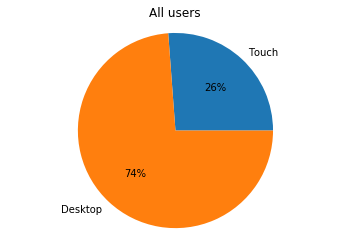

In [41]:
#comparing number of visits from different devices
x = visits[visits['device'] == 'touch']['uid'].count()
y = visits[visits['device'] == 'desktop']['uid'].count()
lables = ['Touch', 'Desktop']
values = [x, y]
fig1, ax1 = plt.subplots()
wedges, text, autotext = ax1.pie(values, labels=lables, autopct='%1.0f%%')
ax1.axis('equal')
plt.title('All users')
plt.show()

As we can see on the pie chart users came from desktop mostly.  
Let's compare number of visits for paying and not paying users: 

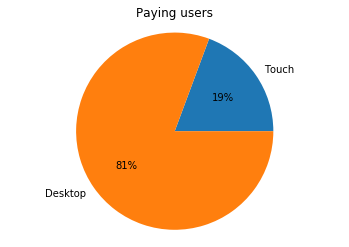

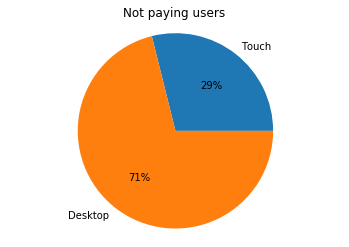

In [42]:
#comparing number of visits from different devices for two groups
#paying group
x_1 = visits.query('uid in @paying_users & device == "touch"')['uid'].count()
y_1 = visits.query('uid in @paying_users & device == "desktop"')['uid'].count()
lables = ['Touch', 'Desktop']
values = [x_1, y_1]
fig1, ax1 = plt.subplots()
wedges, text, autotext = ax1.pie(values, labels=lables, autopct='%1.0f%%')
ax1.axis('equal')
plt.title('Paying users')
plt.show()
#not paying group
x_2 = visits.query('uid not in @paying_users & device == "touch"')['uid'].count()
y_2 = visits.query('uid not in @paying_users & device == "desktop"')['uid'].count()
lables = ['Touch', 'Desktop']
values = [x_2, y_2]
fig1, ax1 = plt.subplots()
wedges, text, autotext = ax1.pie(values, labels=lables, autopct='%1.0f%%')
ax1.axis('equal')
plt.title('Not paying users')
plt.show()

Users from paying group use desktop for visits more than users from not paying group.

[Back to the Table of Contents](#contents)

**1. How many people use it every day, week, and month?**  <a class="anchor" id="chapter15"></a>

**DAU, WAU, MAU** <a class="anchor" id="chapter16"></a>

In [43]:
#creating separate columns for year, month, and week values
#converting the datetime
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
#calculating metrics
dau_total = visits.groupby(['date']).agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
#printing results
print("Number of daily active users:", int(dau_total))
print("Number of weekly active users:", int(wau_total))
print("Number of monthly active users:", int(mau_total))

Number of daily active users: 817
Number of weekly active users: 5148
Number of monthly active users: 20955


In average 817 users came to Yandex.Afisha every day, 5148 users every week and 20955 users every month.  
Let's check how number of visits/users were changing per month and per day:

[Back to the Table of Contents](#contents)

**2. How many sessions are there per day?** <a class="anchor" id="chapter18"></a>

**Usage frequency** <a class="anchor" id="chapter17"></a>

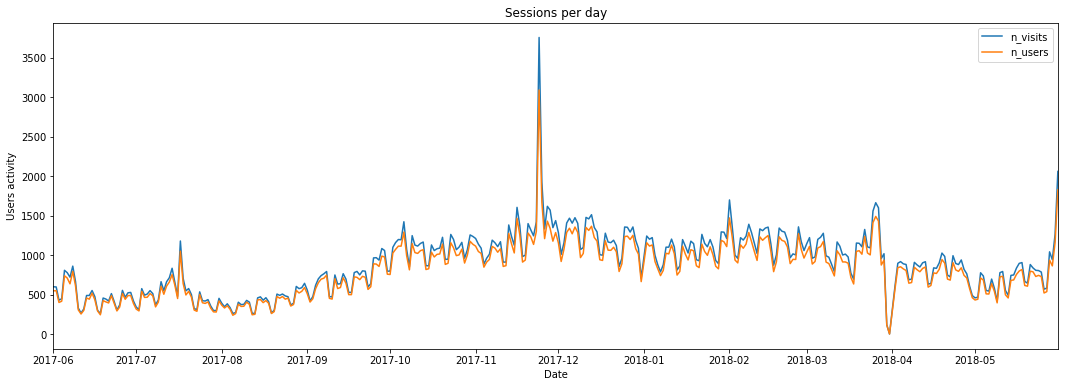

Number of sessions per day: 889
Usage frequency per day: 1.08


In [44]:
#calculating usage frequency
sess_day = visits.pivot_table(index = 'date', values = 'uid', aggfunc= [('count', 'nunique')])
#building graph with sessions per day
sess_day.columns = ['n_visits', 'n_users']
sess_day.plot(kind = 'line', figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Users activity')
plt.title('Sessions per day')
plt.show()

sess_day['frequency'] = sess_day['n_visits']/sess_day['n_users']
print('Number of sessions per day: {:.0f}'.format(sess_day['n_visits'].mean()))
print('Usage frequency per day: {:.2f}'.format(sess_day['frequency'].mean()))

As we can see on the graph number of daily session and users fluctuate evenly, but there is two significant outliers.   
I assume that:
- there was ad promo or maybe few big events in the end of November - highest peak;
- there was technical issue in the end of March - lowest peak.  
  
Number of sessions per day is 889 in average, daily usage frequency is 1.08.

In [45]:
#calculating UF for not paying users
print('Not paying users:')
sessions_per_day = visits.query('uid not in @paying_users').groupby(['date']).agg({'uid': ['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['usage_frequency'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day.mean()

Not paying users:


n_sessions         637.230769
n_users            604.843407
usage_frequency      1.050682
dtype: float64

For not paying users group:
- number of sessions per day is 637;
- number of daily active users is 604;
- usage frequency is 1.05.  
  
Usage frequency for not paying users group a little bit less than common UF.

In [46]:
#calculating UF for paying users
print('Paying users:')
sessions_per_day = visits.query('uid in @paying_users').groupby(['date']).agg({'uid': ['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['usage_frequency'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day.mean()

Paying users:


n_sessions         252.484848
n_users            213.325069
usage_frequency      1.172597
dtype: float64

For paying users group:
- number of sessions per day is 252;
- number of daily active users is 213;
- usage frequency is 1.17.  
  
As we can see paying users visit website more often than not paying users.

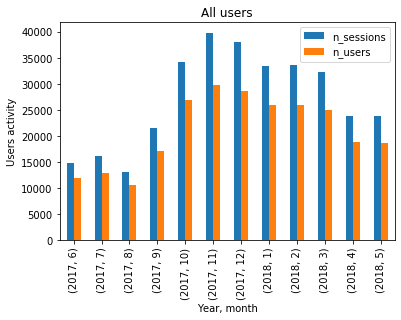

Number of sessions per month: 26967
Usage frequency per month: 1.28


In [47]:
#building graph with sessions per month
sess_month = visits.pivot_table(index = ['year', 'month'], values = 'uid', aggfunc= [('count', 'nunique')])
sess_month.columns = ['n_sessions', 'n_users']
sess_month.plot(kind='bar')
plt.xlabel('Year, month')
plt.ylabel('Users activity')
plt.title('All users')
plt.show()

sess_month['frequency'] = sess_month['n_sessions']/sess_month['n_users']
print('Number of sessions per month: {:.0f}'.format(sess_month['n_sessions'].mean()))
print('Usage frequency per month: {:.2f}'.format(sess_month['frequency'].mean()))

As we can see on the graph monthly session:
- in November - March was more sessions than in other months, probably it cause the weather: when weather is cold people looking for events, instead of walking or something. Also in December and January typical time for new movies/ shows because of New Year;
- in June - August was less sessions than in other months, probably it because summer is high season for vacations and people go to abroad/village/sea/and other;
- there was a highest peak in November 2017 - as I assumed before maybe there was some ad promotion;
- number of users and number of sessions have the same fluctuate.

Number of sessions per month is 26967 in average, monthly usage frequency is 1.28.

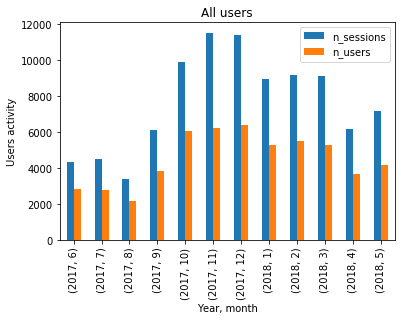

Number of sessions per month: 7638
Usage frequency per month: 1.67


In [48]:
#building graph with sessions per month for paying users group
sess_month = visits.query('uid in @paying_users').pivot_table(index = ['year', 'month'], values = 'uid', aggfunc= [('count', 'nunique')])
sess_month.columns = ['n_sessions', 'n_users']
sess_month.plot(kind='bar')
plt.xlabel('Year, month')
plt.ylabel('Users activity')
plt.title('All users')
plt.show()

sess_month['frequency'] = sess_month['n_sessions']/sess_month['n_users']
print('Number of sessions per month: {:.0f}'.format(sess_month['n_sessions'].mean()))
print('Usage frequency per month: {:.2f}'.format(sess_month['frequency'].mean()))

In general graph for paying users group shows the same fluctuate per months. As I found before, paying users come to website more often than not paying users group and we can see it on the graph. Howewer in November (month where probably was ad promotion) there is not highest peak for number of users in this group, but highest peak for number of sessions.  
For paying group: highest sessions was in November, but highest number of unique users was in December.

[Back to the Table of Contents](#contents)

**3. What is the length of each session?** <a class="anchor" id="chapter19"></a>

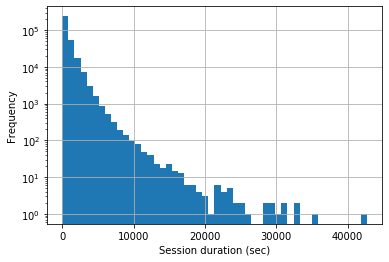

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

Mode session duration: 0    60
dtype: int64


In [49]:
#creating column with session duration seconds
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
#building a histogram
visits['session_duration_sec'].hist(bins=50, log=True)
plt.xlabel('Session duration (sec)')
plt.ylabel('Frequency')
plt.show()
#describing numbers from column
print(visits['session_duration_sec'].describe())
print()
#calculating mode
print('Mode session duration:', visits['session_duration_sec'].mode())

Session duration range from 19 to 42660 seconds.  
42660 seconds it is almost 12 hours, I assume that maybe users opened website and didn't close a page, sometimes returning to the site (in case if automatically stop counting when user froze on one page more than 30 minutes for example) or it can be a bug.  
Anyway most of the users as we can see spending less than 15 minutes on the site.
Median is 6 minutes.  
Average is 12 misutes.  
We have huge spread of data, therefore I found mode - 60 seconds. Most of the users spend 1 minute on the website.  Let's check if it is correct:

In [50]:
long_sess = visits.query('session_duration_sec >= 3600')['uid'].count()
short_sess = visits.query('session_duration_sec <= 60')['uid'].count()
print('Number of sessions longer than 1 hour: {}, {:.2%}'.format((long_sess), (long_sess/len(visits.uid))))
print('Number of sessions shorter than 1 minute: {}, {:.2%}'.format((short_sess), (short_sess/len(visits.uid))))

Number of sessions longer than 1 hour: 6563, 2.03%
Number of sessions shorter than 1 minute: 53897, 16.66%


2% of sessions longer than 1 hour;  
almost 17% of sessions shorter than 1 minute.  
81% of sessions range from 1 minute till 1 hour.  
I will limit session duration time by 1 hour and find average time that users spent on site.

In [51]:
#calculating TSS
TSS = visits.query('session_duration_sec <= 3600')['session_duration_sec'].mean()
print('Average time spent on site: {:.2f}'.format(TSS))

Average time spent on site: 618.17


TSS — time spent on site.  
Around 10 minutes users spend on the website. I think this is enough time for searching events or purchasing.    
Let's check paying users group.

In [52]:
#calculating TSS for paying group
TSS_npg = visits.query('uid not in @paying_users & session_duration_sec <= 3600')['session_duration_sec'].mean()
print('Average time spent on site for not paying users: {:.2f}'.format(TSS_npg))
#calculating TSS for not paying group
TSS_pg = visits.query('uid in @paying_users & session_duration_sec <= 3600')['session_duration_sec'].mean()
print('Average time spent on site for paying users: {:.2f}'.format(TSS_pg))

Average time spent on site for not paying users: 543.98
Average time spent on site for paying users: 811.55


Not paying users spend on the website around 9 minutes.  
Paying users spend on the website around 13 minutes.

[Back to the Table of Contents](#contents)

**4. How often do users come back?** <a class="anchor" id="chapter20"></a>

**Sticky factor:** <a class="anchor" id="chapter21"></a>

In [53]:
#calculating metrics
sticky_wau = dau_total/wau_total*100
sticky_mau = dau_total/mau_total*100

print('Sticky factor for weekly audience:', float(sticky_wau))
print('Sticky factor for monthly audience:', float(sticky_mau))

Sticky factor for weekly audience: 15.880681279293752
Sticky factor for monthly audience: 3.9014860781447385


Sticky factor tells how loyal the audience is — how often they return to the website.    
As we can see 16% of users return after week, but only 3% return after month.  
Sticky factors are quite low, especially when it comes to months.  
I will find retention rate for each users monthly cohort.

[Back to the Table of Contents](#contents)

**Retention rate:** <a class="anchor" id="chapter22"></a>

In [54]:
#creating column with date of first visit and join it to visits df
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')

- I found first visits date and saved it as 'first_activity_date';  
- I joined data from the 'first_activity_date' with the visists table.

In [55]:
#creating column with month of visits and first month of visits
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'] .astype('datetime64[M]')

- I created columns with month and first month of visit

In [56]:
#find the cohort's lifetime
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
#dividing on the constant value np.timedelta64(1,'M') (where 'M' stands for month)
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
#rounding the lifetime values, then converting them to integers
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

- I found user lifetime within the cohort for each row of table, rounded it and converted it to the necessary type.

In [57]:
#grouping the data and finding the number of active users
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

- I grouped the data by cohort and lifetime and found the number of active users at a certain lifetime month for each cohort

In [58]:
#find the initial number of users in the cohort by looking at the 0th month
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

- I found the initial number of users in the cohort

In [59]:
#renaming column
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

- I renamed uid column as cohort_users

In [60]:
#merging the data
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

- I merged the data on cohorts with the initial number of users in the cohort

In [61]:
#calculating the retention rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

- I divided the number of active users in each week by the initial number of users in the cohort and found retention rate

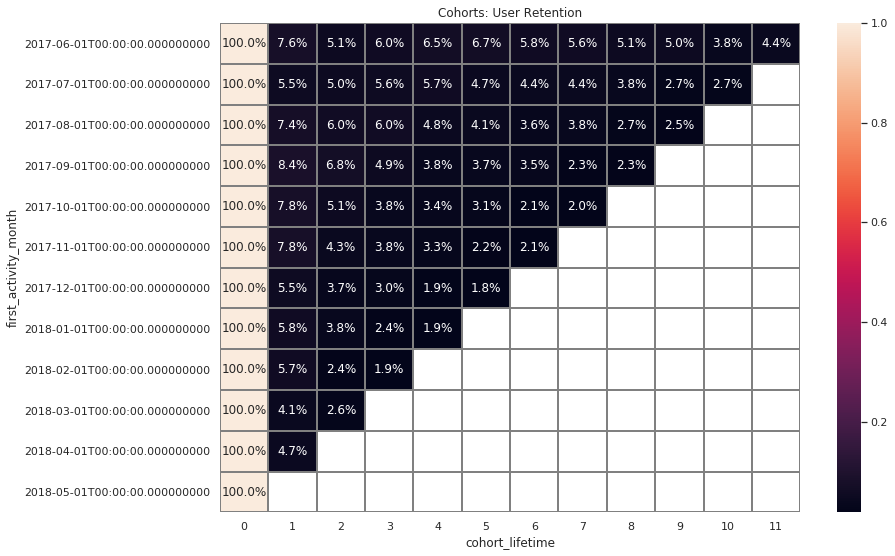

In [62]:
#making a pivot table
retention_pivot = cohorts.pivot_table(index='first_activity_month',
                                      columns='cohort_lifetime',values='retention',aggfunc='sum')
#making a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

CRR - customer retention rate, i.e. the percentage of users who stay with you or make repeat purchases.  
CRR is calculated as the ratio of the difference between the number of customers at the end of the reporting period and the number of new customers to the number of customers at the beginning of the period (measured as a percentage).  
As the ratio grows, the business potential also grows.

Our monthly retention rate is decreasing for each new cohort.  
For December and subsequent cohorts percentage of users who stay decreasing faster than for older cohort.  
For old cohorts we can see that in October - November 2017 retention rate is increasing a bit, but  after November RR is decreasing, probably it is connected to ad promotion in November.
The highest retention rate was 8.4% in October 2017, for the September cohort, which is still quite low.  
In the last months out retention rate is rarely higher than 3%.

[Back to the Table of Contents](#contents)

**Churn rate:** <a class="anchor" id="chapter23"></a>

In [63]:
#calculating churn rate with pct_change() method
cohorts['churn_rate'] = cohorts.groupby(['first_activity_month'])['uid'].pct_change()

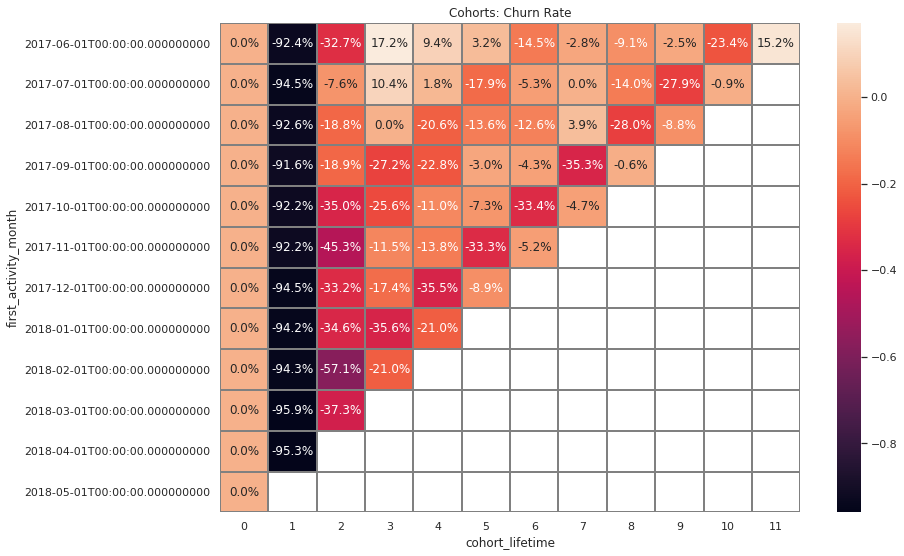

In [64]:
#making a pivot table
churn_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='churn_rate',aggfunc='sum')
#making a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

Churn rate it is the percentage of users who do not return to the site.  
The indicator is calculated as the ratio of the difference between the number of users at the beginning of the reporting period and the number of visitors at the end of the reporting period to the number of customers at the beginning of the month (measured as a percentage).

As we can see from graph almost all the users didn't come back after the first month.  
The first-month churn rate is rising, which means we're losing more and more users with each new cohort. The same I can say about second month.  
In the third month for first 3 cohorts churn rate stopped rising and it was September-November.  
In the April we can see sharp increase of churn rate, probably it connected to technical issue that we had in the end of March.

[Back to the Table of Contents](#contents)

#### 5. Conclusion <a class="anchor" id="chapter41"></a>

**In this step I found:**

Total number of visits: 323604  
Number of users: 207051

1. In average 817 users came to site every day, 5148 users every week and 20955 users every month.
2. Daily usage frequency is 1.08, monthly - 1.28.
3. Users who did purchases came to website more often.
4. Highest number of visits we had in October-December, then January-March 2018, less in April and May 2018 and lowest number of visits in the summer 2017.
5. 74% of users came on site from desktop, 26% form touch.
6. Users who did purchases came to website more often from desktop (81%) than from touch (19%) devices.
7. Around 10 minutes users spend on the website. Users who did purchases in average spend on the website 4 minutes longer than others.
8. 16% of users return after week, 3% return after month.
9. Our monthly retention rate is decreasing for each new cohort.
10. More than 90% users didn't come back after the first month.
11. In the old cohorts we have more loyal users.

[Back to the Table of Contents](#contents)

#### 4.2 Sales <a class="anchor" id="chapter24"></a>

In [65]:
#checking basic values
total_orders = len(orders)
nunique_users_orders = orders.uid.nunique()
print('Total number of orders:', total_orders)
print('Number of unique users:', nunique_users_orders)

Total number of orders: 50364
Number of unique users: 36509


In [66]:
#calculating CR
CR = nunique_users_orders/nunique_users_visits * 100
print('Paying users rate: {:.2f}%'.format(CR))

Paying users rate: 17.63%


CR - conversion rate. This parameter determines how many users who visited the site subsequently became your customers, that is, they bought goods or ordered services.  
Our CR is 17.63%, i.e. alomost 18% of visitors became our buyers.

In [67]:
orders.tail()

,buy_ts,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In the beginning I found that one purchase consider to the June 2018, I will change time of this order to the end of May for correct representing results.

In [68]:
#replacing
orders.loc[orders['buy_ts'] == '2018-06-01 00:02:00', 'buy_ts'] = '2018-05-31 23:59:00'
#converting to the right format
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
#checking result
orders.tail()

,buy_ts,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-05-31 23:59:00,3.42,83872787173869366


Order date and time was changed.

**1. When do people start buying?** <a class="anchor" id="chapter25"></a>

In [69]:
#finding date of first order for each user
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']
#finding date of first session for each user
first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
#merging tables
conversion = pd.merge(first_order_dates, first_session_dates, how='left', on='uid')
#calculating conversion
conversion['turnover_time_days'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days
#result
print(conversion['turnover_time_days'].describe())
print('Mode conversion time :', conversion['turnover_time_days'].mode())

count    36067.000000
mean        15.293149
std         45.636200
min       -328.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        363.000000
Name: turnover_time_days, dtype: float64
Mode conversion time : 0    0.0
dtype: float64


Conversion - the day from registration to the first purchase.  

- conversion time range from -328 to 363 days; 
  
I assume that the reason of negative values here can be bug or users who come through direct link to order page.  
In case with very long time between visit and order I think it is ok, probably first time user visit website 363 for example days ago and after almost one year tis user did order by using direct link, or somethimes we can find event and save it in bookmarks, we don't really need many time to do purchase in this case and our visit can be less than 15 seconds or limit one page (remind that visit with zero second duration were deleted).  

- average is 15 days;
- median is 0 days;
- mode is 0.  
  
I will split conversion time to the groups depending on the duration days.

In [70]:
#categorizing data by conversion groups
def turnover(row):
    turnover = row['turnover_time_days']
        
    if turnover < 0:
        return "Fast buying"
    elif turnover == 0:
        return "Zero days"
    elif 0 < turnover <= 7:
        return "One week"
    elif 7 < turnover <= 14:
        return "Two weeks"
    else:
        return "Long buying"

conversion['turnover_group'] = conversion.apply(turnover, axis = 1)
conversion['turnover_group'].value_counts()

Zero days      26422
Long buying     6107
One week        2915
Two weeks        870
Fast buying      195
Name: turnover_group, dtype: int64

As we can see most popular group with conversion of zero days, then group with conversion more than two weeks, this group 4 times less than first.  
One week conversion group is two times smaller than previous one.  
Two weeks and Fast buying groups are smallest.

[Back to the Table of Contents](#contents)

**2. How many orders do they make during a given period of time?** <a class="anchor" id="chapter26"></a>

In [71]:
#creating separate columns for year, month, and week values.
orders['date'] = orders['buy_ts'].dt.date
orders['week'] = orders['buy_ts'].dt.week
orders['month'] = orders['buy_ts'].dt.month
orders['year'] = orders['buy_ts'].dt.year

#calculating metrics
orders_per_day = orders.groupby(['date']).agg({'uid': 'count'}).mean()
nunique_users_per_day = orders.groupby(['date']).agg({'uid': 'nunique'}).mean()
orders_per_week = orders.groupby(['year', 'week']).agg({'uid': 'count'}).mean()
nunique_users_per_week = orders.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
orders_per_month = orders.groupby(['year', 'month']).agg({'uid': 'count'}).mean()
nunique_users_per_month = orders.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
#printing results
print('Daily:')
print("Number of orders per day:", int(orders_per_day))
print("Number of users buying per day:", int(nunique_users_per_day))
print('Weekly:')
print("Number of orders per week:", int(orders_per_week))
print("Number of users buying per week:", int(nunique_users_per_week))
print('Monthly:')
print("Number of orders per month:", int(orders_per_month))
print("Number of users buying per month:", int(nunique_users_per_month))

Daily:
Number of orders per day: 138
Number of users buying per day: 128
Weekly:
Number of orders per week: 950
Number of users buying per week: 816
Monthly:
Number of orders per month: 4197
Number of users buying per month: 3416


I calculated average number of orders and users who did order per day/week/month.  
Let's check how number of orders/users were changing per month:

[Back to the Table of Contents](#contents)

**Purchase frequency** <a class="anchor" id="chapter27"></a>

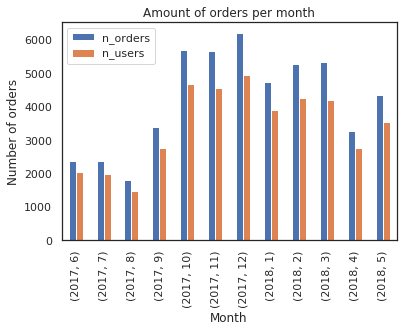

Purchase frequency per month: 1.22


In [72]:
#building a graph with orders per month
p_f = orders.pivot_table(index=['year', 'month'], values='uid', aggfunc=[('count', 'nunique')])
p_f.columns = ['n_orders', 'n_users']
p_f.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Amount of orders per month')
plt.show()
p_f['frequency'] = p_f['n_orders'] / p_f['n_users']
print('Purchase frequency per month: {:.2f}'.format(p_f['frequency'].mean()))

As we can see on the graph monthly orders:
- number of orders/users connected to number of visits/users from visits table, and it is logical, as we found most of the users did purchases in the first visits day;
- in October - December was more orders than in other months;
- in June - August was less orders than in other months;
- there was a highest peak in December 2017 - probably because of the new years events;
- number of users and number of sessions have the same fluctuate.

Purchase frequency is 1.22.

[Back to the Table of Contents](#contents)

**Repeat purchase rate** <a class="anchor" id="chapter28"></a>

RPR calculate same as CRR. I will do the same steps with order tables as i did for visits table.

In [73]:
#calculating RPR
first_order_date = orders.groupby('uid')['buy_ts'].min() 
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [74]:
orders['lifetime'] = orders['order_month'] - orders['first_order_month']
orders['lifetime'] = orders['lifetime'] / np.timedelta64(1,'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')

In [75]:
cohorts_1 = orders.groupby(['first_order_month','lifetime']).agg({'uid':'nunique'}).reset_index()

In [76]:
initial_users_count_1 = cohorts_1[cohorts_1['lifetime'] == 0][['first_order_month','uid']]
initial_users_count_1 = initial_users_count_1.rename(columns={'uid':'cohort_users'})
cohorts_1 = cohorts_1.merge(initial_users_count_1, on='first_order_month')

In [77]:
cohorts_1['retention'] = cohorts_1['uid']/cohorts_1['cohort_users']

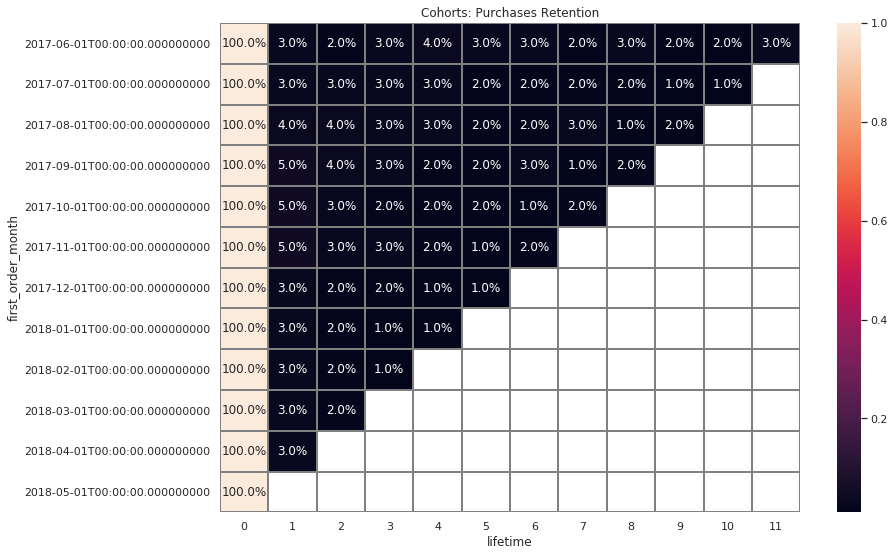

In [78]:
#making a pivot table
retention_pivot_1 = cohorts_1.pivot_table(index='first_order_month',
                                      columns='lifetime',values='retention',aggfunc='sum').round(2)
#making a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Purchases Retention')
sns.heatmap(retention_pivot_1, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

RPR - Repurchase Ratio - Frequency of repeat purchases. This indicator is akin to CRR, but reflects not only overall satisfaction with the service, but also the service / product itself.
RPR is calculated as the ratio of the number of customers who have purchased or ordered services more than once during the reporting period to the total number of customers.

Our RPR is so low as CRR.  
RPR is decreasing for each new cohort.  
From the second month our repurchase ratio keeps at 2-3%.  
The same as CRR RPR for december and subsequent cohorts percentage of users who were buying decreasing faster than for older cohort.  
For old cohorts we can see that in October - December 2017 RPR is increasing a bit, but after December RPR is decreasing.  
The highest repurchase ratio was 5% in October-December 2017, for the September-November cohorts, which is still quite low.

[Back to the Table of Contents](#contents)

**3. What is the average purchase size?** <a class="anchor" id="chapter29"></a>

**ARPU, ARPPU, AOV** <a class="anchor" id="chapter30"></a>

In [79]:
#calculating metrics
total_revenue = orders.revenue.sum()
print('Total_revenue = ', total_revenue)
print('Number of purchases = ', total_orders)
ARPU = total_revenue/nunique_users_visits
print('Average revenue per user = ', ARPU)
ARPPU = total_revenue/nunique_users_orders
print('Average revenue pre paying user:', ARPPU)
AOV = total_revenue/total_orders
print('Average order value:', AOV)

Total_revenue =  252057.2
Number of purchases =  50364
Average revenue per user =  1.2173677016773645
Average revenue pre paying user: 6.903974362485963
Average order value: 5.004709713287269


AOV - average order/purchase value - average check, i.e. how much company earn on average on one order. 

[Back to the Table of Contents](#contents)

**4. How much money do they bring?**<a class="anchor" id="chapter31"></a>

In [80]:
#checking revenue
orders.revenue.describe()

count    50364.000000
mean         5.004710
std         21.828823
min          0.010000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Revenue from orders range from 0.01 (probably user used some promocode or cupon) to 2633.28 (I assume this is corporate customers).  
I think cause we have corporate customers and revenue have high spread we can trust more to **median revenue - 2.5**.

In [81]:
#calculating revenue per day/week/month
revenue_per_day = orders.groupby(['date']).agg({'revenue': 'sum'}).mean()
revenue_per_week = orders.groupby(['year', 'week']).agg({'revenue': 'sum'}).mean()
revenue_per_month = orders.groupby(['year', 'month']).agg({'revenue': 'sum'}).mean()
print("Average revenue per day:", int(revenue_per_day))
print("Average revenue per week:", int(revenue_per_week))
print("Average revenue per month:", int(revenue_per_month))

Average revenue per day: 694
Average revenue per week: 4755
Average revenue per month: 21004


Let's check how revenue were changing per month:

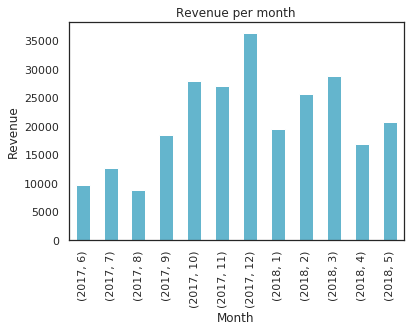

In [82]:
#building graph for revenue rep month
orders.groupby(['year', 'month'])['revenue'].sum().plot(kind='bar', color='c')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per month')
plt.show()

As we can see revenue fluctuate as same as number of orders.  
Let's check how the average revenue per user changed over time. 

In [83]:
#calculating revenue per users for cohorts
orders_grouped = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped['revenue_per_user'] = orders_grouped['revenue'] / orders_grouped['uid']
orders_grouped = orders_grouped.reset_index()
#making a table with revenue per cohort
orders_grouped.pivot_table(index='first_order_month',
                           columns='order_month',values='revenue_per_user',aggfunc='mean', margins = True).fillna('')

order_month,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,All
first_order_month,,,,,,,,,,,,,
2017-06-01 00:00:00,4.72675,16.0954,17.7068,35.7648,23.7768,22.2078,31.4967,25.0332,19.2957,27.2336,25.6813,9.804151,21.568580
2017-07-01 00:00:00,,6.01335,12.3963,21.036,10.7861,6.93816,7.89684,6.42111,6.99282,7.38214,12.8618,11.513846,10.021681
2017-08-01 00:00:00,,,5.28037,11.1488,11.8513,12.183,16.9212,12.1391,9.62033,12.6105,21.07,8.307419,12.113196
2017-09-01 00:00:00,,,,5.64891,22.3604,13.5446,138.669,19.8815,26.095,27.4371,16.9614,11.044651,31.293644
2017-10-01 00:00:00,,,,,5.00373,11.2874,6.75325,7.41315,7.0728,7.25514,6.57321,7.479701,7.354802
2017-11-01 00:00:00,,,,,,5.15936,7.359,6.78658,12.5107,7.53938,4.58083,7.564839,7.357236
2017-12-01 00:00:00,,,,,,,4.74243,7.81658,39.366,48.1351,27.4314,23.518413,25.168315
2018-01-01 00:00:00,,,,,,,,4.13564,8.72123,12.3655,11.1998,4.699556,8.224346
2018-02-01 00:00:00,,,,,,,,,4.15699,8.61,4.94241,6.941026,6.162607


In the first month when bigest number of users did purchases we have lowest revenue per user.  
Mostly the average revenue from users who continue making orders is increasing.  
After 2-3 month users making more expensive orders or maybe it connected with corporate clients.  
The highest number of revenue per user is 138.669 for december orders of september cohorts, I almost sure that this is our corporate clients.

[Back to the Table of Contents](#contents)

**Lifetime value** <a class="anchor" id="chapter32"></a>

In [84]:
#finding number of users
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [85]:
#calculating revenue for each cohhort
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [86]:
#merging tables
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [87]:
#finding age of cohort
report['lifetime'] = report['order_month'] - report['first_order_month']
report['lifetime'] = report['lifetime']/np.timedelta64(1, 'M')
report['lifetime'] = report['lifetime'].round().astype('int')

In [88]:
#calculating LTV
report['ltv'] = report['revenue'] *0.4 / report['n_buyers'] 
#margin rate = 0.4

LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability (margin rate).
We can't find exact margin rate (there is no data except revenue from orders and expenses for marketing), we can presume margin rate is 0.4 (typically for this kind of business).  
*our mentor suggested it:  
*(link: https://yandex-students.slack.com/archives/C01AB3UAP45/p1600102231014700?thread_ts=1600101333.014200&cid=C01AB3UAP45 )  
*margin rate is gross profit devide by the revenue

In [89]:
#making pivot table
output_ltv = report.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='mean').round(2)
#printing output with cumulative sum
output_ltv.cumsum(axis=1).fillna('') 

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.89,2.08,2.26,2.64,3.05,3.34,3.72,3.95,4.17,4.41,4.64,4.74
2017-07-01,2.41,2.54,2.79,2.93,3,3.06,3.11,3.17,3.23,3.29,3.35,
2017-08-01,2.11,2.3,2.48,2.64,2.84,2.95,3.03,3.19,3.31,3.39,,
2017-09-01,2.26,2.71,2.92,4.51,4.67,4.93,5.21,5.31,5.38,,,
2017-10-01,2.00,2.21,2.29,2.35,2.41,2.46,2.49,2.54,,,,
2017-11-01,2.06,2.22,2.3,2.43,2.49,2.51,2.56,,,,,
2017-12-01,1.90,2,2.37,2.8,2.93,3.07,,,,,,
2018-01-01,1.65,1.77,1.89,1.95,1.98,,,,,,,
2018-02-01,1.66,1.77,1.8,1.83,,,,,,,,


LTV - lifetime value - the total income that you receive from one client for the entire time of his interaction with your company. For purposes of cohort analysis, LTV is a cohort's cumulative revenue, accounting for the number of people in the cohort.  
 
The row of the cohort table specifies the revenue the cohort brought.  
From the 1st row we can see that the customers who placed their first order in June 2017 brought in a total revenue of 4.74 over their twelve-month lifetime. 
September cohort have highest LTV - 5.38, but we detected here huge order that were done in December.  
In general our LTV through cohorts were decreasing. 

[Back to the Table of Contents](#contents)

#### Conclusion  <a class="anchor" id="chapter42"></a>

**In this step I found:**  

Total number of orders: 50364
Number of unique users: 36509  

1. Conversion rate is 17.63%.
2. Most of the users did order in the first day of visit.
3. On average 138 orders were done per day, 950 - per week and 4197 per month.
4. On average 128 users did orders per day, 816 - per week and 3416 per month.
5. Purchase frequency is 1.22.
6. In October - December were more orders than in other months, in June - August was less orders.
7. Desember were most popular month for orders.
8. On average only 2-3% of users who did purchase were returning next months.
9. Our monthly repurchase ratio is decreasing for each new cohort.
10. More than 95% users didn't come back after the first order.
11. LTV of the oldest cohort is 4.75.
12. Number of active users in every cohort decreases from month to month, revenue per user increases. 

[Back to the Table of Contents](#contents)

#### 4.3 Marketing <a class="anchor" id="chapter33"></a>

In [90]:
#calculating profit/loss
total_costs = costs.costs.sum()
print('Total:')
print('Revenue:', total_revenue)
print('Costs:', total_costs)
print('Total: {:.2f}'.format(total_revenue - total_costs))

Total:
Revenue: 252057.2
Costs: 329131.62
Total: -77074.42


Total marketing expenses more than total revenue.

In [91]:
#calculating profit/loss per one order 
one_unit_revenue = total_revenue / total_orders
one_unit_var_costs = total_costs/ total_orders
print('Per unit:')
print('Revenue: {:.2f}'.format(one_unit_revenue))
print('Costs: {:.2f}'.format(one_unit_var_costs))
print('Profit: {:.2f}'.format(one_unit_revenue - one_unit_var_costs))

Per unit:
Revenue: 5.00
Costs: 6.54
Profit: -1.53


We don't have any data about other costs except marketing or other revenue except revenue from orders. According information that we have we always get a loss, 1.53 from each order.  
I will build a business model, but I don't think that it make sense, but anyway we can try to check if there is a chance to get any profit if we would increase marketing costs.

In [92]:
#making a business model
def unit_economics(marketing):    
    items_sold = marketing / one_unit_var_costs
    revenue = one_unit_revenue * items_sold
    var_costs = one_unit_var_costs * items_sold
    return revenue - var_costs
#applying model
for m in range(0, 1000000, 100000):
    print('Profit/loss: {} with a budget of {}'.format(unit_economics(m), m))

Profit/loss: 0.0 with a budget of 0
Profit/loss: -23417.5069536011 with a budget of 100000
Profit/loss: -46835.0139072022 with a budget of 200000
Profit/loss: -70252.52086080331 with a budget of 300000
Profit/loss: -93670.0278144044 with a budget of 400000
Profit/loss: -117087.53476800554 with a budget of 500000
Profit/loss: -140505.04172160663 with a budget of 600000
Profit/loss: -163922.54867520765 with a budget of 700000
Profit/loss: -187340.0556288088 with a budget of 800000
Profit/loss: -210757.56258240982 with a budget of 900000


This is an obvious result, even with marketing expenses is 900000 we can't get profit. Also as we can see the higher marketing costs the bigger loss.

**1. How much money was spent? Overall/per source/over time** <a class="anchor" id="chapter34"></a>

In [93]:
print('Overal marketing expenses:', total_costs)

Overal marketing expenses: 329131.62


In [94]:
#calculating marketing expenses per day/month
costs['month'] = costs['date'].astype('datetime64[M]')
costs_per_day = costs.groupby('date').agg({'costs': 'sum'}).mean()
costs_per_month = costs.groupby('month').agg({'costs': 'sum'}).mean()
print("Average marketing expenses per day:", int(costs_per_day))
print("Average marketing expenses per month:", int(costs_per_month))

Average marketing expenses per day: 904
Average marketing expenses per month: 27427


Let's check how the costs changed over time:

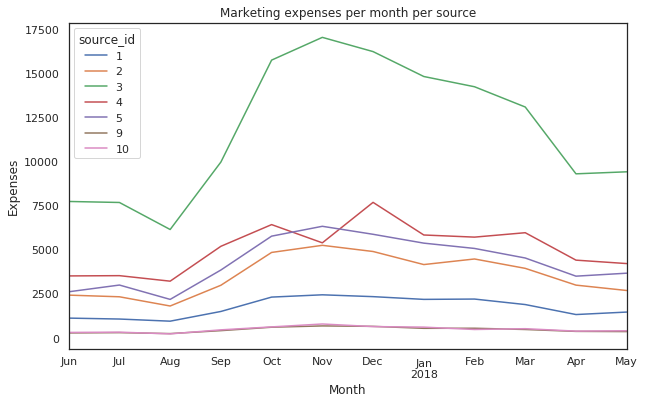

In [95]:
#making a graph
costs.pivot_table(index='month',columns = 'source_id', values='costs', aggfunc='sum').plot(figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Expenses')
plt.title('Marketing expenses per month per source')
plt.show()

The main ad source for us was the third one - we spent more our budget on it.  
We didn't spend equal amounts for each source (and overall) through a year. And it gave us results - users visits were changing according to our overall investments (October-January were months with highest visits).  

[Back to the Table of Contents](#contents)

**2. How much did customer acquisition from each of the sources cost?** <a class="anchor" id="chapter35"></a>

In [96]:
#finding total costs per source
costs_by_source = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')
costs_by_source.reset_index()
#finding number of unique users per source
users_by_source = visits.groupby('source_id').agg({'uid':'nunique'}).reset_index()
users_by_source.columns = ['source_id', 'n_users']
#merging tables
m_costs = costs_by_source.merge(users_by_source, on='source_id')

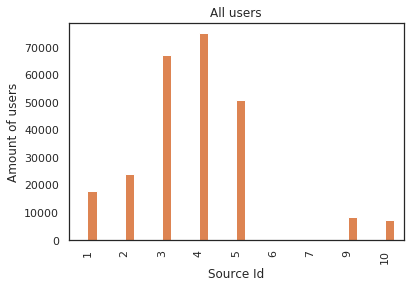

In [97]:
#making graph
visits.pivot_table(index = 'source_id', values = 'uid', aggfunc='nunique').plot(kind='bar', legend=False)
plt.xlabel('Source Id')
plt.ylabel('Amount of users')
plt.title('All users')
plt.show()

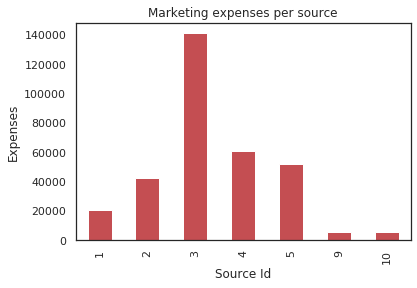

In [98]:
#making graph
costs_by_source.plot(kind='bar', legend=False, color='r')
plt.xlabel('Source Id')
plt.ylabel('Expenses')
plt.title('Marketing expenses per source')
plt.show()

Highest investition were in 3rd source, but people were coming from 4th much actively.  
Other visits correspond to investment.  

In [99]:
#calculating costs per user
m_costs['costs_per_user'] = m_costs['costs']/m_costs['n_users']
m_costs.reset_index()
m_costs.sort_values('n_users', ascending=False).style.format({'costs':'{:.2f}', 'costs_per_user':'{:.2f}'}).hide_index()

source_id,costs,n_users,costs_per_user
4,61073.60,75080,0.81
3,141321.63,67284,2.10
5,51757.10,50921,1.02
2,42806.04,24152,1.77
1,20833.27,17960,1.16
9,5517.49,8504,0.65
10,5822.49,7208,0.81


I sorted values by number of users in this table.  
As we can see source where biggest amount of users came is 4 and the cost of attracting a client is not the highest.  
The 3rd source is most expencive per user.  
The 5th source, also popular, have a middle cost per user.  
2nd and 1st sources that not popular, gave us twice less users than 5th source, but were more expensive per user that 5th.    
Let's check our paying users group.

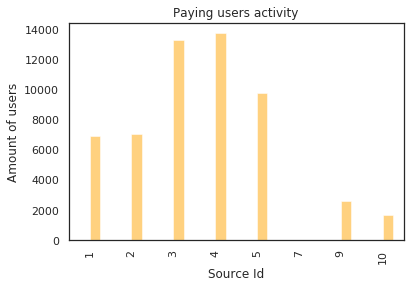

In [100]:
visits.query('uid in @paying_users').pivot_table(index = 'source_id', 
                                                 values = 'uid', 
                                                 aggfunc='nunique').plot(kind='bar',
                                                                         legend=False, 
                                                                         alpha=0.5, color='orange')
plt.title('Paying users activity')
plt.xlabel('Source Id')
plt.ylabel('Amount of users')
plt.show()

1st and 2nd source was supported lightly, but brought us more users who did purchases.

[Back to the Table of Contents](#contents)

**Customer Acquisition Cost** <a class="anchor" id="chapter36"></a>

Let's run calculations and determine the number of months each cohort requires to cover marketing expenses. We'll calculate CAC for each cohort. First we'll find the total expenses for each month, then we'll divide them by the number of customers in each cohort:

In [101]:
monthly_costs = costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


Let's add the data on costs to the report and calculate CAC:

In [102]:
report_cac = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
report_cac.head()

,first_order_month,n_buyers,order_month,revenue,lifetime,ltv,source_id,costs,cac
0,2017-06-01,2022,2017-06-01,9557.49,0,1.890700,1020,18015.0,8.909496
1,2017-06-01,2022,2017-07-01,981.82,1,0.194227,1020,18015.0,8.909496
2,2017-06-01,2022,2017-08-01,885.34,2,0.175141,1020,18015.0,8.909496
3,2017-06-01,2022,2017-09-01,1931.30,3,0.382057,1020,18015.0,8.909496
4,2017-06-01,2022,2017-10-01,2068.58,4,0.409215,1020,18015.0,8.909496


In [103]:
#making table with cac
output_cac = report_cac.pivot_table(index='first_order_month', values='cac', 
                                    aggfunc='mean').round(2).reset_index()

output_cac.fillna('')

,first_order_month,cac
0,2017-06-01,8.91
1,2017-07-01,9.49
2,2017-08-01,10.80
3,2017-09-01,9.45
4,2017-10-01,8.37
5,2017-11-01,9.30
6,2017-12-01,8.75
7,2018-01-01,9.94
8,2018-02-01,8.96
9,2018-03-01,8.61


CAC - customer acquisition cost - the cost of attracting a user. Simply put, this is the amount you spend on attracting each new visitor through a specific ad campaign. CAC is calculated as the ratio of the costs of one advertising campaign to the number of orders from it.

As we know in healthy per-customer economics, LTV is greater than CAC.  
If we compare our LTV and CAC - investment in customer acquisition did not paid off and even not close to profit.
For example LTV for oldest cohort is 4.74 and CAC 8.91.

[Back to the Table of Contents](#contents)

**3. How worthwhile where the investments?** <a class="anchor" id="chapter37"></a>

In [104]:
#calculating ROMI
ROMI = (total_revenue - total_costs) / total_costs
print('ROMI: {:.2%}'.format(ROMI))

ROMI: -23.42%


In order to distinguish between payoff for the business and payoff for an ad campaign, ROMI (return on marketing investment) is calculated instead of ROI.  
According our ROMI the business got a -23% return on these investments.

**Return on marketing investment** <a class="anchor" id="chapter38"></a>

And now let's find ROMI for cohorts by dividing LTV by CAC:

In [105]:
#calculating ROMI
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']

In [106]:
#making a table
output_2 = report_cac.pivot_table(index='first_order_month', columns='lifetime',
                                  values='romi', aggfunc='mean')

output_2.cumsum(axis=1).round(2).fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.21,0.23,0.25,0.3,0.34,0.38,0.42,0.44,0.47,0.5,0.52,0.53
2017-07-01,0.25,0.27,0.29,0.31,0.32,0.32,0.33,0.33,0.34,0.35,0.35,
2017-08-01,0.20,0.21,0.23,0.24,0.26,0.27,0.28,0.3,0.31,0.31,,
2017-09-01,0.24,0.29,0.31,0.48,0.49,0.52,0.55,0.56,0.57,,,
2017-10-01,0.24,0.26,0.27,0.28,0.29,0.29,0.3,0.3,,,,
2017-11-01,0.22,0.24,0.25,0.26,0.27,0.27,0.28,,,,,
2017-12-01,0.22,0.23,0.27,0.32,0.33,0.35,,,,,,
2018-01-01,0.17,0.18,0.19,0.2,0.2,,,,,,,
2018-02-01,0.19,0.2,0.2,0.2,,,,,,,,


ROMI is increasing month by month, but for 12 month investment haven't paid off. If we had good RPR I would assume that costs will pay off in two years, but we don't have good RPR, it means we needv to urgently change something in order to increase profits.

[Back to the Table of Contents](#contents)

#### 4. Conclusion  <a class="anchor" id="chapter39"></a>

**In this step I found:**  
  
Overal marketing expenses: 329131.62  
1. According information that we have we always get a loss, 1.53 from each order.
2. On average marketing expenses per day is 904, per month is 27427.
3. Highest investition were in 3rd source, but people were coming from 4th much actively. Other visits correspond to investment.
4. 2nd and 1st source more popular for paying users group than for others.
5. Investment haven't paid off.

Even if at first months an advertising campaign seems ineffective, but you know for sure that customers will spend more money on the second and subsequent purchase, you can afford such advertising. This will bring you profit in the future. BUT as we can see from our LTV and RPR ad campaing will not pid off in the future.

[Back to the Table of Contents](#contents)

### 5. General conclusion <a class="anchor" id="chapter40"></a>

**Main points and patterns:**

**According information that we have we always get a loss, 1.53 from each order. Marketing investment haven't paid off.**

During analysis I found that:
1. More than 90% users didn't come back after the first month, 16% of users return after week, 3% return after month. Our monthly retention rate is decreasing for each new cohort. In the old cohorts we have more loyal users.
2. Users who did purchases came to website more often.

First of all if the company wants to get profit I can recomend to work on user retention. We need more loyal users who will come back on the website again and again and as analysis shows users who did purchases came to website more often. Also we have more loyal users in the old cohorts, we need to find out why new users have less loyality?

---

3. More than 95% users didn't come back after the first order. On average only 2-3% of paying users were returning next months.
4. Number of active users in every cohort decreases from month to month, revenue per user increases.

The same situation as with CRR, we need to motivate users for repeat purchases. As analysis shows on the next orders users spend more money. Maybe our loyalty programs need to be corrected?

---

5. Conversion rate is 17.63%.
6. Most of the users did order in the first day of visit.

We need more users who become byers.  
On the first visit user need to be motivated to do order.
Also we need to work on our ad, to attract more people who will do purchases. Maybe user who just got to the site is not our target audience.

---

7. Highest number of visits and orders in October-December, lowest in the summer.
8. Most of the users came on site from desktop than form touch.
9. Highest investition were in 3rd source, but people were coming from 4th much actively;
10. 1st and 2nd sources are more popular for paying users group than for others.

If the goal is increasing number of visits and decreasing marketing costs pay attention at 4th source, it less expensive and attractive more people.  
If we want to see the highest conversion from visits to orders - pay attention on 1st and 2nd sources.

[Back to the Table of Contents](#contents)